### Subset Distributions

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from wakeful import log_munger, metrics, virus_total, pipelining, preprocessing
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from bat.dataframe_to_matrix import DataFrameToMatrix
%matplotlib inline

#### dnscat2

In [2]:
df_train_conn_dnscat2 = log_munger.hdf5_to_df('dnscat2-2017-12-31-conn-train', './data')
df_test_conn_dnscat2 = log_munger.hdf5_to_df('dnscat2-2017-12-31-conn-test', './data')
print('train value counts:\n', df_train_conn_dnscat2.label.value_counts())
print('test value counts:\n', df_test_conn_dnscat2.label.value_counts())

train value counts:
 0    27255
1    25770
Name: label, dtype: int64
test value counts:
 0    27226
1     1515
Name: label, dtype: int64


In [3]:
df_train_conn_dnscat2 = df_train_conn_dnscat2.dropna(axis=0, how='any')

In [4]:
y_df_train_conn_dnscat2 = df_train_conn_dnscat2.pop('label')
to_matrix = DataFrameToMatrix()
X_matrix_train_conn_dnscat2 = to_matrix.fit_transform(df_train_conn_dnscat2)


Normalizing column orig_bytes...
Normalizing column orig_ip_bytes...
Normalizing column orig_pkts...
Normalizing column resp_bytes...
Normalizing column resp_ip_bytes...
Normalizing column resp_pkts...
Normalizing column pcr...


### PCA Feature Reduction

In [5]:
pca = PCA(n_components=6)
pca.fit(X_matrix_train_conn_dnscat2)
print(sum(pca.explained_variance_ratio_), '=', pca.explained_variance_ratio_)
print(pca.n_components_)
X_matrix_train_conn_dnscat2 = pca.fit_transform(X_matrix_train_conn_dnscat2)

0.999998616255 = [  5.18704853e-01   3.28438712e-01   9.41390541e-02   5.78402396e-02
   8.11272170e-04   6.44858263e-05]
6


In [6]:
X_matrix_train_conn_dnscat2.shape

(46183, 6)

### SequentialFeature Reduction

In [7]:
sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X, y)

NameError: name 'knn' is not defined

In [ ]:
sns.pairplot(df_train_conn_dnscat2, hue='label')

### Distributions

In [9]:
%ls ./data

c2/
dnscat2-2017-12-31-conn-test.h5
dnscat2-2017-12-31-conn-train.h5
dnscat2-2017-12-31-dns-test.h5
dnscat2-2017-12-31-dns-train.h5
home/
iodine-forwarded-2017-12-31-conn-test.h5
iodine-forwarded-2017-12-31-conn-train.h5
iodine-forwarded-2017-12-31-dns-test.h5
iodine-forwarded-2017-12-31-dns-train.h5
iodine-raw-2017-12-31-conn-test.h5
iodine-raw-2017-12-31-conn-train.h5
iodine-raw-2017-12-31-dns-test.h5
iodine-raw-2017-12-31-dns-train.h5


In [17]:
keys = [
        ('iodine-forwarded-2017-12-31-conn-test', 'iodine-forwarded-2017-12-31-conn-train'),
        ('iodine-raw-2017-12-31-conn-test', 'iodine-raw-2017-12-31-conn-train'),
        ('dnscat2-2017-12-31-conn-test', 'dnscat2-2017-12-31-conn-train'),
        ('iodine-forwarded-2017-12-31-dns-test', 'iodine-forwarded-2017-12-31-dns-train'),
        ('iodine-raw-2017-12-31-dns-test', 'iodine-raw-2017-12-31-dns-train'),
        ('dnscat2-2017-12-31-dns-test', 'dnscat2-2017-12-31-dns-train'),]

In [18]:
train_key = 'iodine-forwarded-2017-12-31-conn-train'
test_key = 'iodine-forwarded-2017-12-31-conn-test'
data_dir='./data'

In [19]:
train_df = log_munger.hdf5_to_df(key, data_dir)
test_df = log_munger.hdf5_to_df(key, data_dir)

In [20]:
df.columns

Index(['local_orig', 'local_resp', 'orig_bytes', 'orig_ip_bytes', 'orig_pkts',
       'resp_bytes', 'resp_ip_bytes', 'resp_pkts', 'label', 'pcr',
       'is_ipv4_host', 'is_ipv6_host', 'is_ipv4_resp', 'is_ipv6_resp'],
      dtype='object')

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   21.0s finished

[2018-01-23 08:22:21] Features: 1/5 -- score: 0.627819548872[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    6.7s finished

[2018-01-23 08:22:27] Features: 2/5 -- score: 0.710526315789[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    8.6s finished

[2018-01-23 08:22:36] Features: 3/5 -- score: 0.976399331662[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.9s finished

[2018-01-23 08:22:46] Features: 4/5 -- score: 0.988095238095[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


--------------------------------------------------------------------------------
  avg_score   ci_bound                                         cv_scores  \
1   0.62782   0.254641  [0.526315789474, 0.785714285714, 0.571428571429]   
2  0.710526    0.23353  [0.631578947368, 0.857142857143, 0.642857142857]   
3  0.976399  0.0375583             [0.964912280702, 1.0, 0.964285714286]   
4  0.988095  0.0378863                        [1.0, 1.0, 0.964285714286]   
5  0.988095  0.0378863                        [1.0, 1.0, 0.964285714286]   

       feature_idx    std_dev    std_err  
1             (8,)   0.113157  0.0800143  
2           (0, 8)   0.103776  0.0733805  
3        (0, 8, 9)  0.0166902  0.0118017  
4     (0, 3, 8, 9)  0.0168359  0.0119048  
5  (0, 1, 3, 8, 9)  0.0168359  0.0119048  

--------------------------------------------------------------------------------
           0           1           2              3          4           5   \
0  local_orig  local_resp  orig_bytes  orig

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.0s finished

[2018-01-23 08:22:53] Features: 5/5 -- score: 0.988095238095

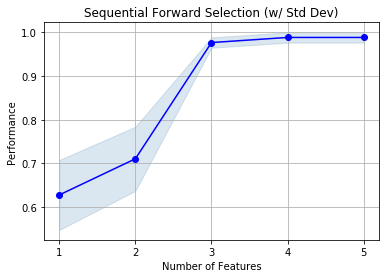

NameError: name 'split_X_y' is not defined

In [25]:
pipelining.feature_selection_pipeline(train_df=train_df, test_df=test_df)

In [30]:
df = df[['local_orig', 'local_resp', 'orig_ip_bytes', 'pcr', 'label']]

KeyError: "['is_ipv4_hostlabel'] not in index"

In [28]:
df = df.dropna(axis=0, how='any')

KeyError: 'label'

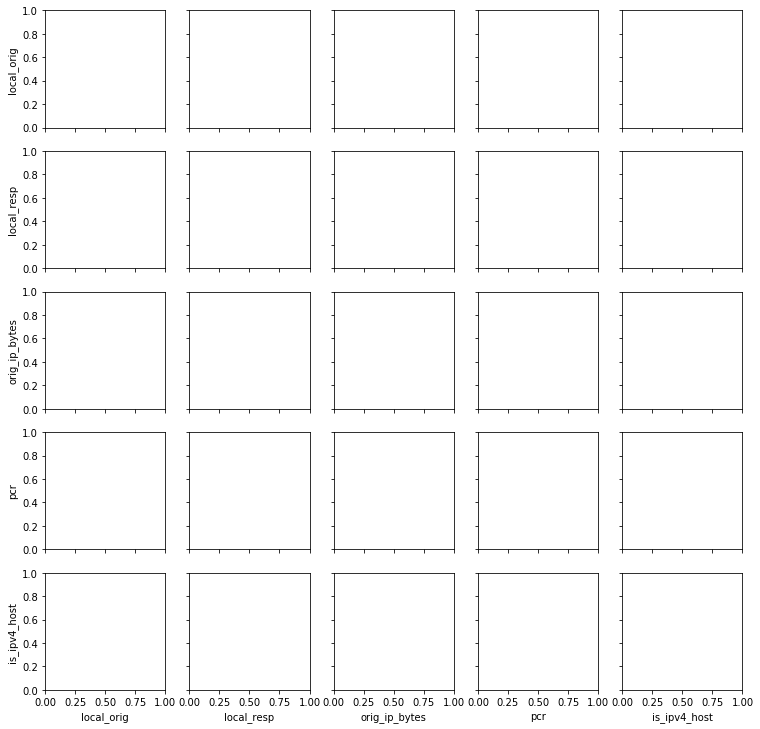

In [29]:
sns.pairplot(df, hue='label')